<h4> 1. Instalação e importação de pacotes</h4>

In [9]:
#### Pandas - Análise de Dados ####
#%pip install pandas

#### Numpy - Cálculos de vetores e matrizes ####
#%pip install numpy

#### Scipy - Cálculos, integrais, equações diferenciais ####
#%pip install scipy

#### Matplotlib e Seaborn - Visualização de dados e gráficos ####
#%pip install matplotlib
#%pip install seaborn

##################################################################

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h4> 2. Tratamento dos dados</h4>

<h5> - 2.1. Leitura do dataframe </h5>

In [14]:
#Leitura do dataframe
dataset = pd.read_csv(
    filepath_or_buffer='diabetes.csv',
    sep=',',
    header=0
)
#Mostra os primeiros registros
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<h5> - 2.2. Verificando as informações do dataframe </h5>

In [21]:
#Informações sobre as variáveis
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [26]:
#Faz um sumário do dataset. O .T serve para pivotar o resultado
#Round para arredondar os resultados em 2 casas decimais
#dataset.describe().T
round(dataset.describe().T, 2)

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.85,3.37,0.00,1.00,3.00,6.00,17.00
Glucose,768.0,120.89,31.97,0.00,99.00,117.00,140.25,199.00
BloodPressure,768.0,69.11,19.36,0.00,62.00,72.00,80.00,122.00
SkinThickness,768.0,20.54,15.95,0.00,0.00,23.00,32.00,99.00
Insulin,768.0,79.80,115.24,0.00,0.00,30.50,127.25,846.00
BMI,768.0,31.99,7.88,0.00,27.30,32.00,36.60,67.10
DiabetesPedigreeFunction,768.0,0.47,0.33,0.08,0.24,0.37,0.63,2.42
Age,768.0,33.24,11.76,21.00,24.00,29.00,41.00,81.00
Outcome,768.0,0.35,0.48,0.00,0.00,0.00,1.00,1.00


<h4> 3. Matriz de correlação</h4>

Text(0.5, 1.0, 'Correlação das features')

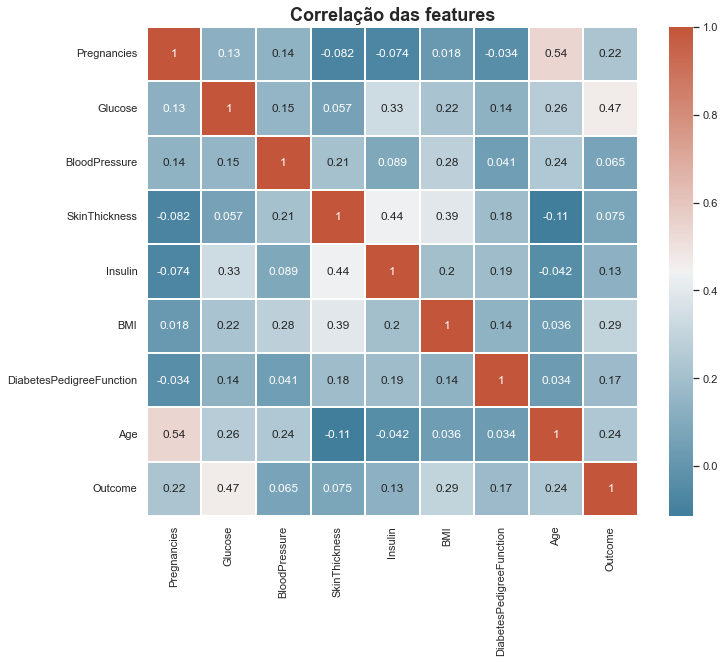

In [59]:
#Setar o tema do gráfico no Seaborn
sns.set_theme(style='white')

#Definir a matriz de correlação
corr = dataset.corr()

#Definindo um mapa de cores divergentes
cmap = sns.diverging_palette(230, 20, as_cmap=True)

#Definindo o tamanho da figura
f, ax = plt.subplots(figsize=(11, 9))

#### Heatmap de Correlação ####
sns.heatmap(
    data = corr, #dados
    cmap = cmap, 
    linewidth = .10, #linhas entre os quadrados
    annot=True #incluir o valor nas figuras
)
plt.title('Correlação das features', size=18, fontweight='bold') #Título do gráfico

In [30]:
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000
